<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

 </center></font></h1>
<h2><font color='0B5345'> <center>
Bioseñales y Sistemas</center></font></h2>
<font  face="Courier New" size="3">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Práctica 3 (Parte 1): Análisis estadístico en señales ECG </center></font></h2>
<font  face="Courier New" size="2">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Isabella Vásquez García </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
C.C. 1000.438.341 </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
Marie Anne Johanna Bernal Diaz </center></font></h2>
<font  face="Courier New" size="1">

 </center></font></h1>
<h2><font color='0B5345'> <center>
C.C. 1003.894.043 </center></font></h2>
<font  face="Courier New" size="1">

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia - Bioingeniería</font></b> </center></p3>

Inicialmemte, es necesario importar las librerías a utilizar:

In [1]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu
from statsmodels.tsa.stattools import adfuller

Posteriormente, se carga el archivo que nos entregará las señales a las que se les realizará el análisis estadístico

In [6]:
from google.colab import files
# Se carga el archivo al espacio de trabajo de Colab
load = files.upload()
# Debido a que el archivo tiene una extensión .mat, es necesario utilizar la función scipy.io.loadmat
data = scipy.io.loadmat('/content/signals.mat')
# Creamos una copia de los datos para evitar modificar el archivo original
copy_data = data.copy()
# Visualizamos
print(copy_data)

Saving signals.mat to signals (2).mat
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 20 15:20:29 2015', '__version__': '1.0', '__globals__': [], 'Fs': array([[1024]], dtype=uint16), 'ECG_asRecording': array([[3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
        4365.31103516, 4370.91796875]]), 'ECG_filtered': array([[ 8.87103896e-03,  5.62737497e+01,  8.57077127e+01, ...,
        -1.20952610e+02, -1.31734356e+02, -1.32898021e+02]]), 'EMG_filtered1': array([[ 17.65905117,  19.41391578,  18.89666666, ..., 242.49414224,
        220.4135886 , 151.5810508 ]]), 'EMG_filtered2': array([[  21.1780547 ,  -79.82418538, -133.65960989, ..., -384.58994036,
        -539.9349533 , -772.65519631]]), 'EMG_asRecording1': array([[ 908.07531738,  903.17706299,  896.62982178, ..., 1433.91882324,
        1416.109375  , 1352.75012207]]), 'EMG_asRecording2': array([[-3109.97558594, -3231.01391602, -3302.34960938, ...,
        -3791.24267578, -3924.6550293 , -4

Como podemos ver, los datos se encuentran en un diccionario, por lo que vamos extraer las claves del diccionario con la función .keys() para visualizar mejor que datos tenemos

In [32]:
copy_data.keys()
ECG = copy_data['ECG_asRecording']
ECG_filtrado =  copy_data['ECG_filtered']

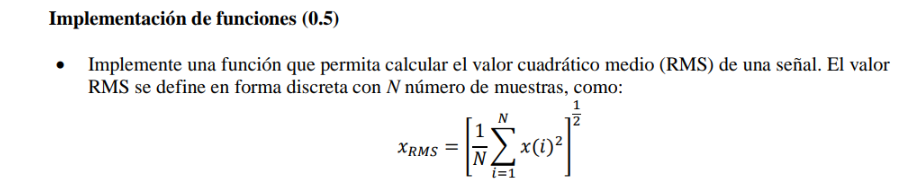

In [38]:
# La función del RMS se compone de una sumatoria de cada muestra. A este resultado se le halla el promedio y se le saca raiz cuadrada
def RMS(s):
  rms = np.sqrt(np.mean(s**2))
  return rms

In [39]:
# Prueba de como trabaja la función que se creó anteriormente
señal=np.array([2,4,5,6,7])
print(RMS(señal))

5.0990195135927845


#**Análisis Estadístico de ECG**

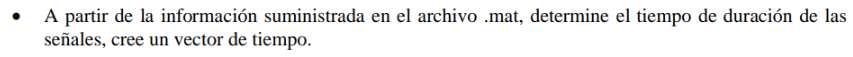

En el enunciado se menciona que la tasa de muestreo fué de 1024 Hz, por lo que el periodo de muestreo es 1/1024 segundos.

In [40]:
F = 1024 #Hz
T = 1/F
# Como no podemos asumir que la señal cruda y la filtrada tiene el mismo vector de tiempo, se crea uno por cada señal.
ECG_t= np.arange(0,ECG.size*T,T)
print(ECG_t)
ECG_filtrado_t = np.arange(0,ECG_filtrado.size*T,T)
print(ECG_filtrado_t)

[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]
[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]


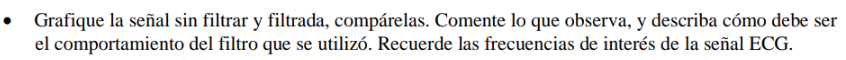

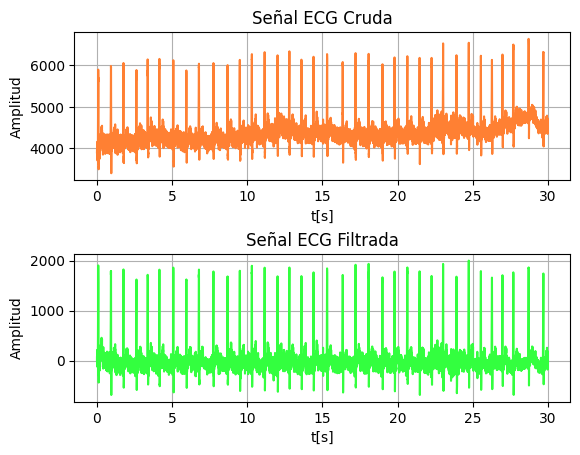

In [48]:
ECG_1D = ECG.flatten()
ECG_filtrado_1D = ECG_filtrado.flatten()

plt.subplots_adjust(hspace=0.5, wspace=0.6)

plt.subplot(2,1,1)
plt.plot(ECG_t,ECG_1D, "#ff8033")
plt.title('Señal ECG Cruda')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(ECG_filtrado_t,ECG_filtrado_1D,"#33ff3f")
plt.title('Señal ECG Filtrada')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

Debido a que el periodo de muestreo es de 1/1024, es decir aproximadamente 0,97ms, cada vez que se cumpla este tiempo se toma una muestra. Gráficamente podemos evidenciar que la señal filtrada respecto a la cruda, no presenta tendencias lineales por lo posiblemente se utilizó un filtro para eliminar esto. También evidenciamos que la amplitud de las señales es de 2000, por lo que esta propiedad no cambia en las dos señales y puede deberse a que el filtro utilizado es de ganacia 1. Finalmente, también evidenciamos que la señal cruda presentaba un offset en 4000 mientras que en la señal filtrada se eliminó el mismo.

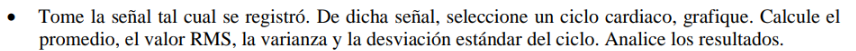

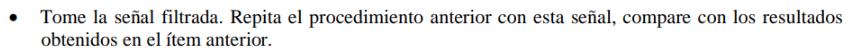

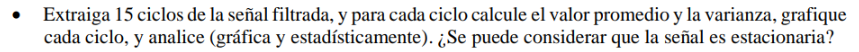

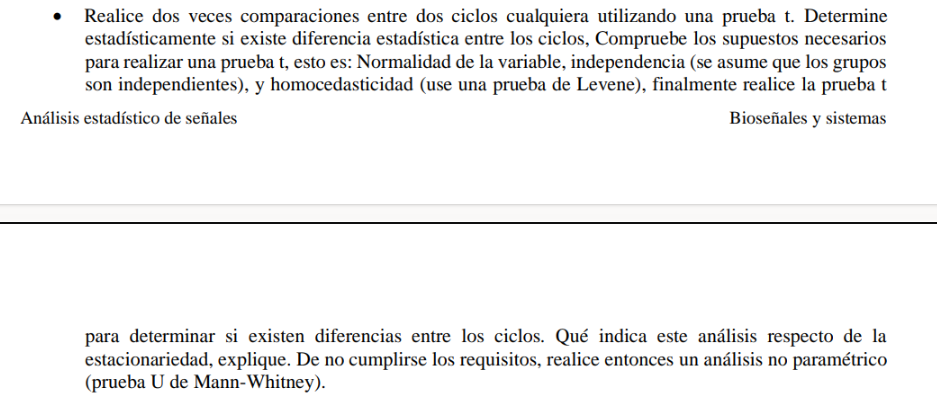

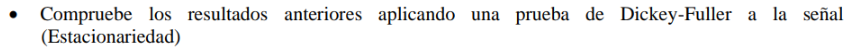